# Summarize titers and sequences by date

Create a single histogram on the same scale for number of titer measurements and number of genomic sequences per year to show the relative contribution of each data source.

In [1]:
import Bio
import Bio.SeqIO
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
# Configure matplotlib theme.
fontsize = 14
matplotlib_params = {
    'axes.labelsize': fontsize,
    'font.size': fontsize,
    'legend.fontsize': 12,
    'xtick.labelsize': fontsize,
    'ytick.labelsize': fontsize,
    'text.usetex': False,
    'figure.figsize': [6, 4],
    'savefig.dpi': 300,
    'figure.dpi': 300,
    'text.usetex': False
}

plt.rcParams.update(matplotlib_params)

# Turn off spines for all plots.
plt.rc("axes.spines", top=False, right=False)

In [3]:
matplotlib.get_configdir()

u'/Users/jlhudd/.matplotlib'

In [4]:
plt.style.use("huddlej")

In [5]:
plt.style.available

[u'seaborn-darkgrid',
 u'seaborn-notebook',
 u'classic',
 u'seaborn-ticks',
 u'grayscale',
 u'bmh',
 u'seaborn-talk',
 u'dark_background',
 u'ggplot',
 u'fivethirtyeight',
 u'_classic_test',
 u'seaborn-colorblind',
 u'seaborn-deep',
 u'seaborn-whitegrid',
 u'huddlej',
 u'seaborn-bright',
 u'seaborn-poster',
 u'seaborn-muted',
 u'seaborn-paper',
 u'seaborn-white',
 u'seaborn-pastel',
 u'seaborn-dark',
 u'seaborn',
 u'seaborn-dark-palette']

## Load sequences

In [6]:
# Open FASTA of HA sequences for H3N2.
sequences = Bio.SeqIO.parse("../dist/fauna/data/h3n2_ha.fasta", "fasta")

In [7]:
# Get strain names from sequences.
distinct_strains_with_sequences = pd.Series([sequence.name.split("|")[0].replace("-egg", "")
                                             for sequence in sequences]).drop_duplicates()

In [8]:
distinct_strains_with_sequences.shape

(58646,)

In [9]:
# Parse years from distinct strains with titers.
sequence_years = distinct_strains_with_sequences.apply(lambda strain: int(strain.split("/")[-1])).values

In [10]:
# Omit invalid sequence years.
sequence_years = sequence_years[sequence_years < 2019]

In [11]:
sequence_years.shape

(58636,)

## Load titers

In [12]:
# Read titers into a data frame.
titers = pd.read_table(
    "../dist/fauna/data/h3n2_who_hi_cell_titers.tsv",
    header=None,
    index_col=False,
    names=["test", "reference", "serum", "source", "titer", "assay"]
)

In [13]:
# Identify distinct viruses represented as test strains in titers.
distinct_strains_with_titers = titers["test"].str.replace("-egg", "").drop_duplicates()

In [14]:
# Parse years from distinct strains with titers.
titer_years = distinct_strains_with_titers.apply(lambda strain: int(strain.split("/")[-1])).values

In [15]:
# Omit invalid titer years.
titer_years = titer_years[titer_years < 2019]

In [16]:
titer_years.shape

(11968,)

## Plot sequence and titer strains by year

In [17]:
sequence_years.min()

1968

In [18]:
sequence_years.max()

2018

In [19]:
[sequence_years, titer_years]

[array([2012, 2017, 2015, ..., 2016, 2017, 2007]),
 array([2013, 2012, 2014, ..., 2012, 2012, 2012])]

In [20]:
sequence

SeqRecord(seq=Seq('ctattaaccatgaagactatcattgctttgagctacattctatgtctggttttc...taa', SingleLetterAlphabet()), id='A/Managua/28/2007|flu|EPI154138|2007-06-11|north_america|nicaragua|managua|managua|cell|other_database_import|?|?', name='A/Managua/28/2007|flu|EPI154138|2007-06-11|north_america|nicaragua|managua|managua|cell|other_database_import|?|?', description='A/Managua/28/2007|flu|EPI154138|2007-06-11|north_america|nicaragua|managua|managua|cell|other_database_import|?|?', dbxrefs=[])

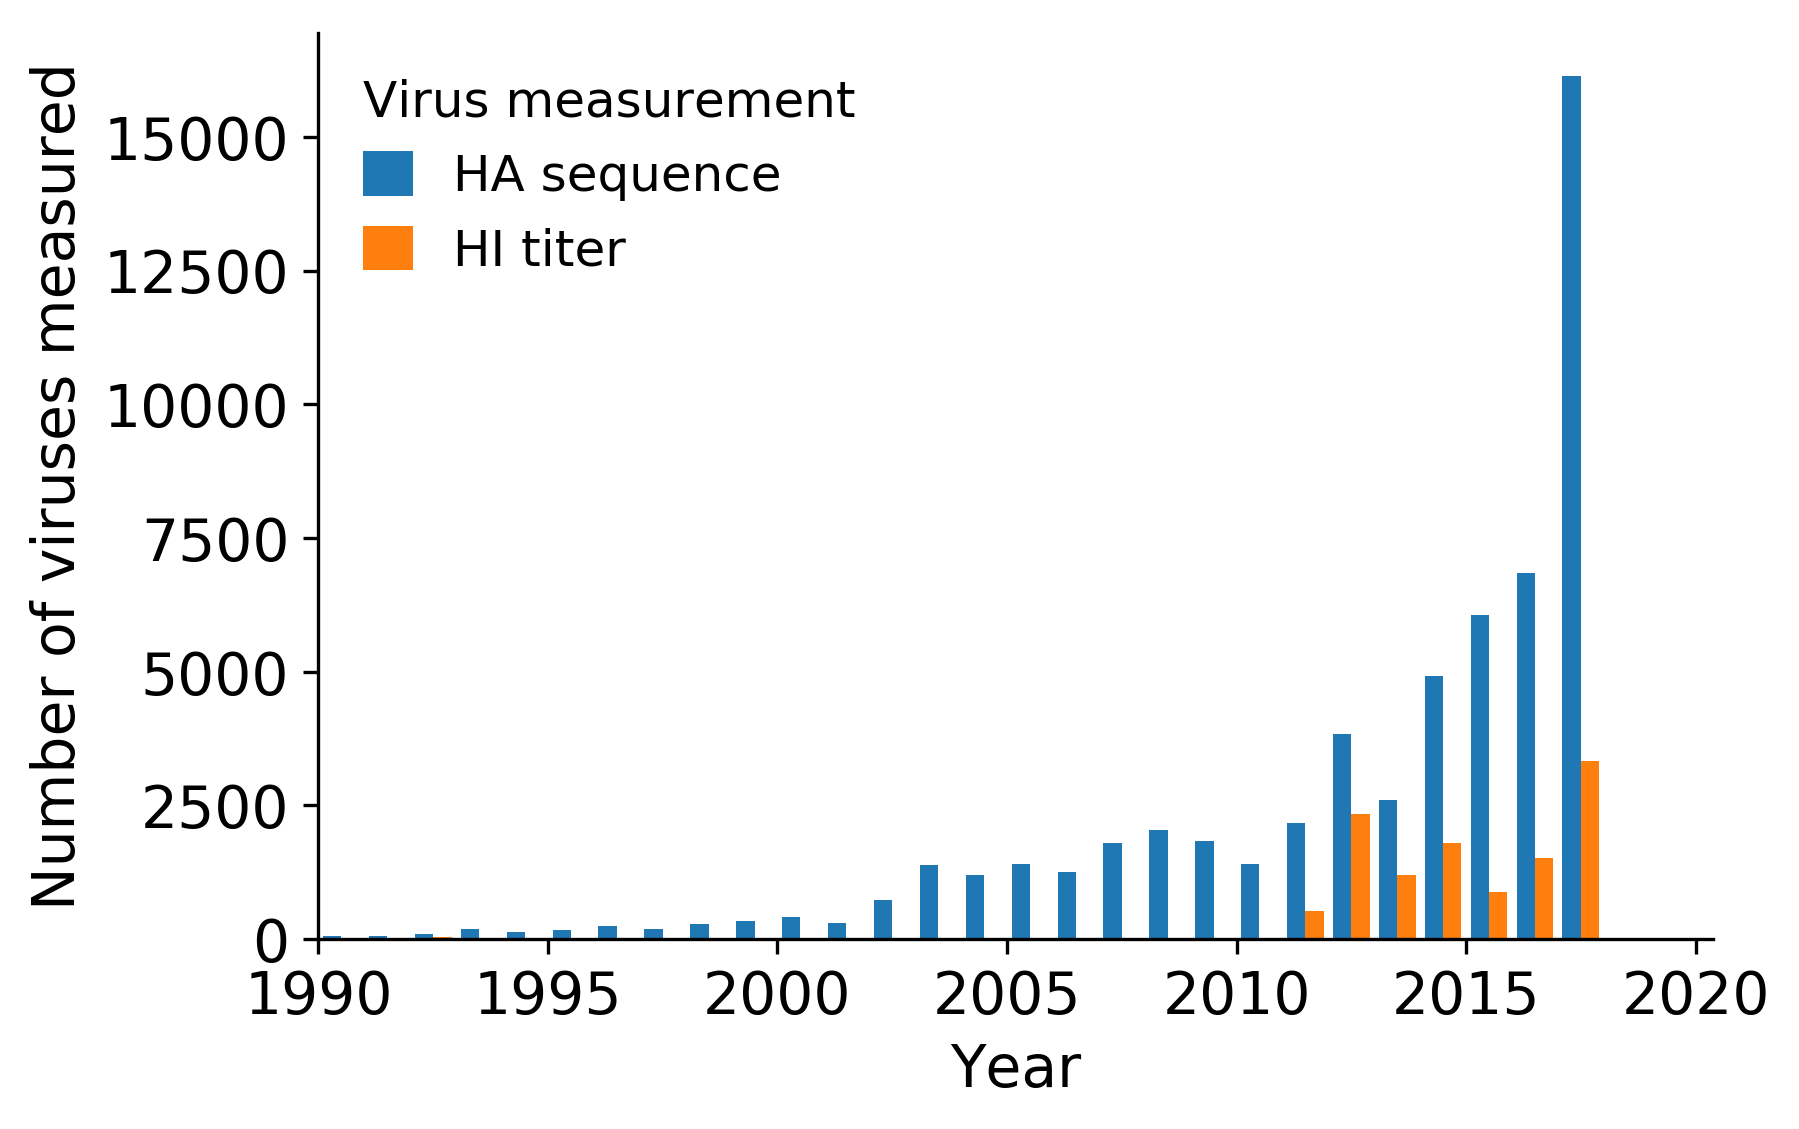

In [22]:
fig, ax = plt.subplots(1, 1)
bins = np.arange(1968, 2019)
ax.hist([sequence_years, titer_years], bins, histtype="bar", label=["HA sequence", "HI titer"])

legend = ax.legend(
    loc="upper left",
    ncol=1,
    frameon=False,
    handlelength=1,
    fancybox=False,
    handleheight=1
)
legend.set_title("Virus measurement", prop={"size": 12})
legend._legend_box.align = "left"

ax.set_xlim(1990)
ax.set_xlabel("Year")
ax.set_ylabel("Number of viruses measured")